<img src="./Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 1

## Juan Manuel Ronchetti


### Dado el siguiente circuito:
<img src="./Imagen_Circuito.png" /> 

### 1) Obtener la función transferencia V2/V1 ( módulo, fase y diagrama de polos y ceros)

In [15]:
from IPython.display import IFrame
IFrame("./TS1_1.pdf", width=800, height=1200)

### 2) ¿Qué tipo de filtro es?

Se trata de un filtro _allpass_ o _pasatodo_, el cual permite el paso de todo el rango de frecuencias.

### 3) Obtenga la función transferencia, pero normalizada.

In [20]:
from IPython.display import IFrame
IFrame("./TS1_2.pdf", width=800, height=500)

 ### ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?

La norma de frecuencia en este caso se corresponde a la frecuencia para la cual la fase presenta un corrimiento de 90º.

### 4) Simule la función transferencia normalizada (Python, Matlab, etc.).

En este punto se simuló la transferencia normalizada, asignando valores de 0.1, 1 y 10 a R2/R1 para observar las variaciones en la transferencia:

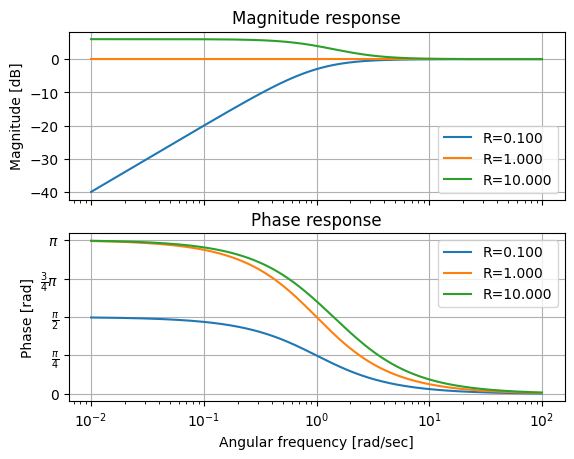

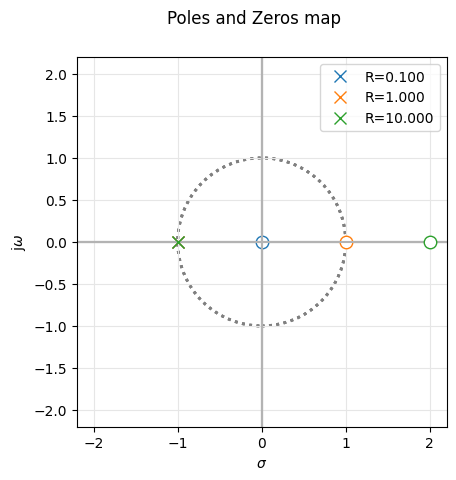

In [2]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

R_param = [ 0.1, 1, 10] # R=R2/R1

for R in range(len(R_param)):
    
    my_tf = TransferFunction( [1, -R], [1, 1] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'R={:3.3f}'.format(R_param[R]) )
    
    pzmap(my_tf, fig_id=2, filter_description = 'R={:3.3f}'.format(R_param[R]) )

### 5) Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  
* R2/R1=1
* R3=1kΩ
* C=1µF

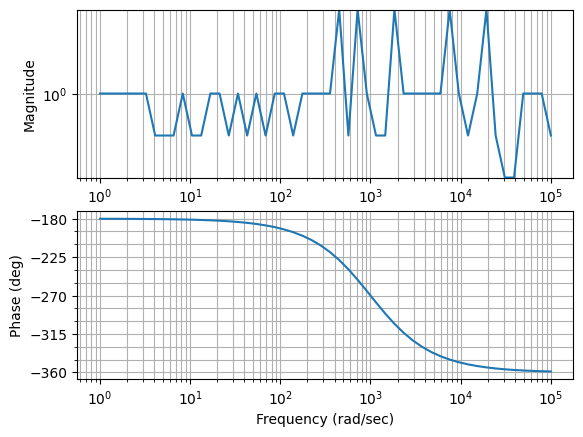

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control

R=1
R3=1000
C1=1e-6 

G = control.tf( [1, -(1)/(R3*C1)], [1, 1/(R3*C1)] )
(num,den) = control.pade(0,1)
Gp = control.tf(num,den)*G

w = np.logspace(0,5)
mag,phase,omega = control.bode(Gp,w)

### 6) ¿Qué utilidad podría tener este tipo de circuitos?

El filtro pasatodo provee un corrimiento de fase dependiente de la frecuencia, sin afectar al modulo, el cual resulta util para aplicaciones de comunicaciones.